
=== KMeans ===
Silhouette Score: 0.3063915718120718
Davies-Bouldin Score: 1.148308589305395

=== Agglomerative ===
Silhouette Score: 0.3842610697331072
Davies-Bouldin Score: 0.9380573335336801

=== DBSCAN ===
Silhouette Score: 0.428719570463622
Davies-Bouldin Score: 0.8787778314646946


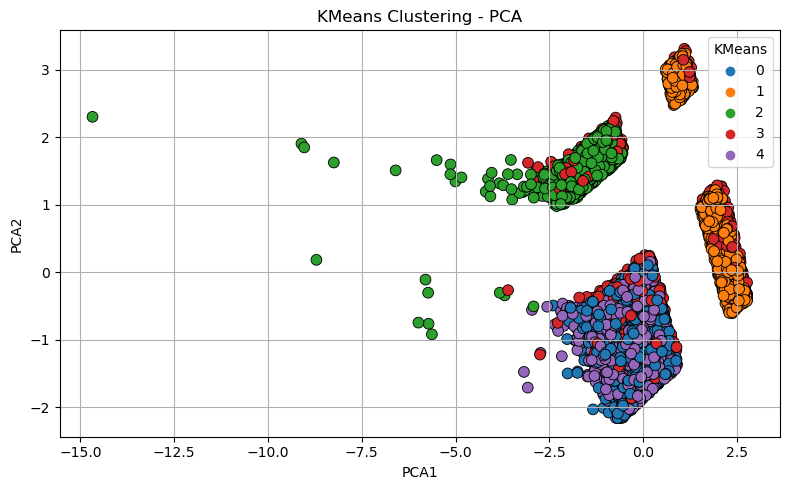

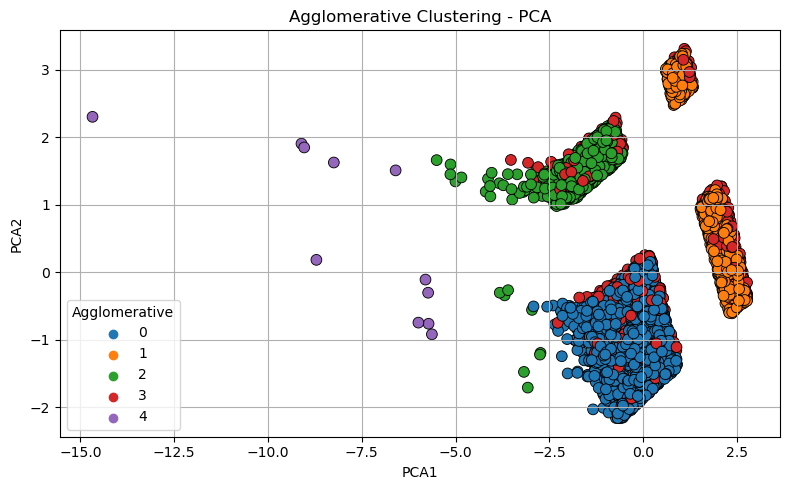

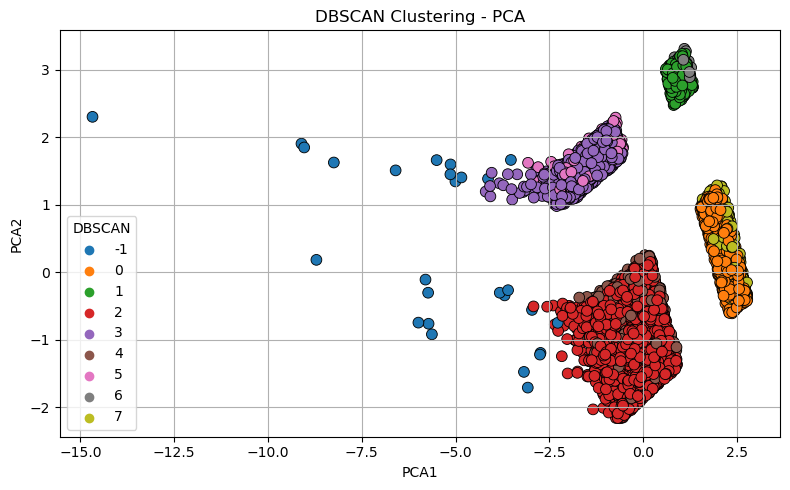

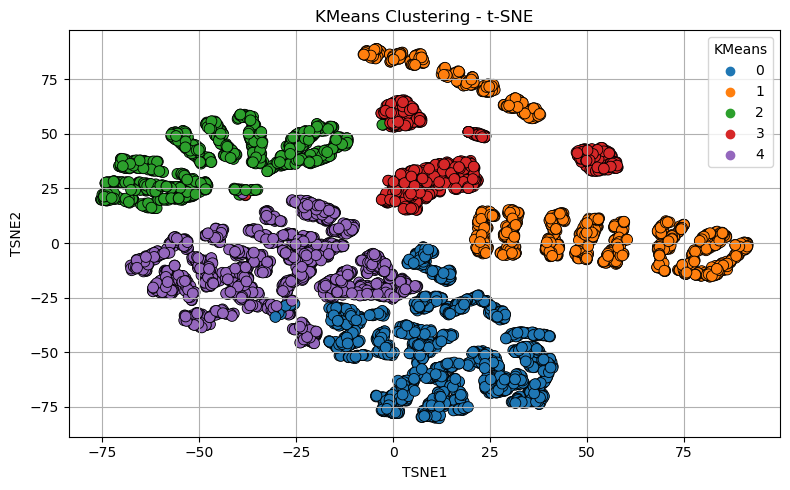

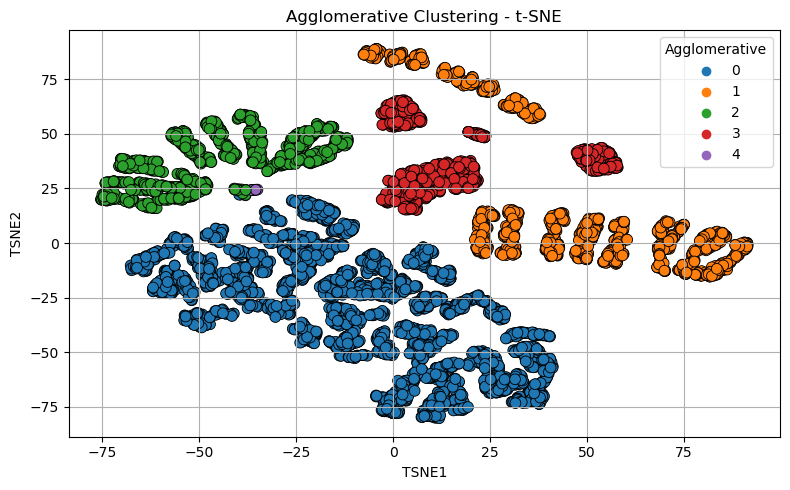

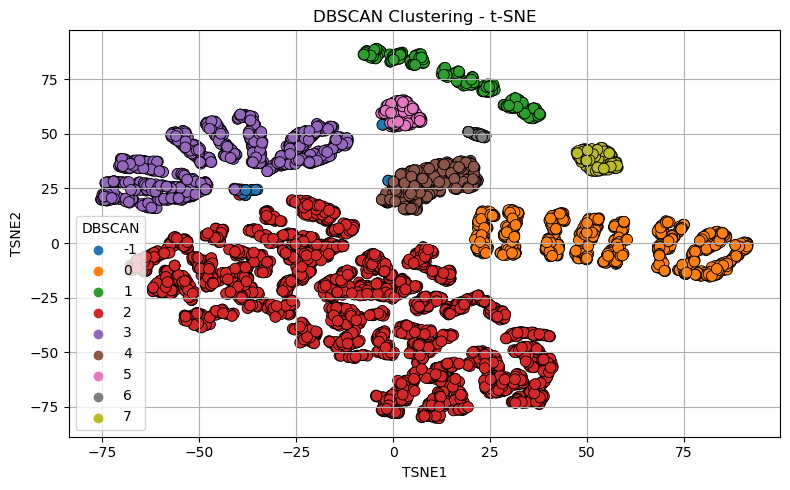

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train = pd.read_csv("data/train_data.csv")
scaler = StandardScaler()
X = scaler.fit_transform(train)
results = {}

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)
results['KMeans'] = {
    'labels': y_kmeans,
    'silhouette': silhouette_score(X, y_kmeans),
    'davies_bouldin': davies_bouldin_score(X, y_kmeans)
}
train['KMeans'] = y_kmeans

agg = AgglomerativeClustering(n_clusters=5)
y_agg = agg.fit_predict(X)
results['Agglomerative'] = {
    'labels': y_agg,
    'silhouette': silhouette_score(X, y_agg),
    'davies_bouldin': davies_bouldin_score(X, y_agg)
}
train['Agglomerative'] = y_agg

dbscan = DBSCAN(eps=1.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)
train['DBSCAN'] = y_dbscan

mask = y_dbscan != -1
if len(set(y_dbscan)) > 1 and mask.sum() > 0:
    results['DBSCAN'] = {
        'labels': y_dbscan,
        'silhouette': silhouette_score(X[mask], y_dbscan[mask]),
        'davies_bouldin': davies_bouldin_score(X[mask], y_dbscan[mask])
    }
else:
    results['DBSCAN'] = {'labels': y_dbscan, 'silhouette': None, 'davies_bouldin': None}

for method, metrics in results.items():
    print(f"\n=== {method} ===")
    print(f"Silhouette Score: {metrics['silhouette']}")
    print(f"Davies-Bouldin Score: {metrics['davies_bouldin']}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
train['PCA1'] = X_pca[:, 0]
train['PCA2'] = X_pca[:, 1]

for method in results.keys():
    plt.figure(figsize=(8, 5))
    plt.title(f"{method} Clustering - PCA")
    sns.scatterplot(data=train, x='PCA1', y='PCA2', hue=method, palette='tab10', s=60, edgecolor='black')
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X)
train['TSNE1'] = X_tsne[:, 0]
train['TSNE2'] = X_tsne[:, 1]

for method in results.keys():
    plt.figure(figsize=(8, 5))
    plt.title(f"{method} Clustering - t-SNE")
    sns.scatterplot(data=train, x='TSNE1', y='TSNE2', hue=method, palette='tab10', s=60, edgecolor='black')
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
